In [1]:
import matplotlib.pyplot as plt
import polars as pl 

# Average objective and path length for each algorithm

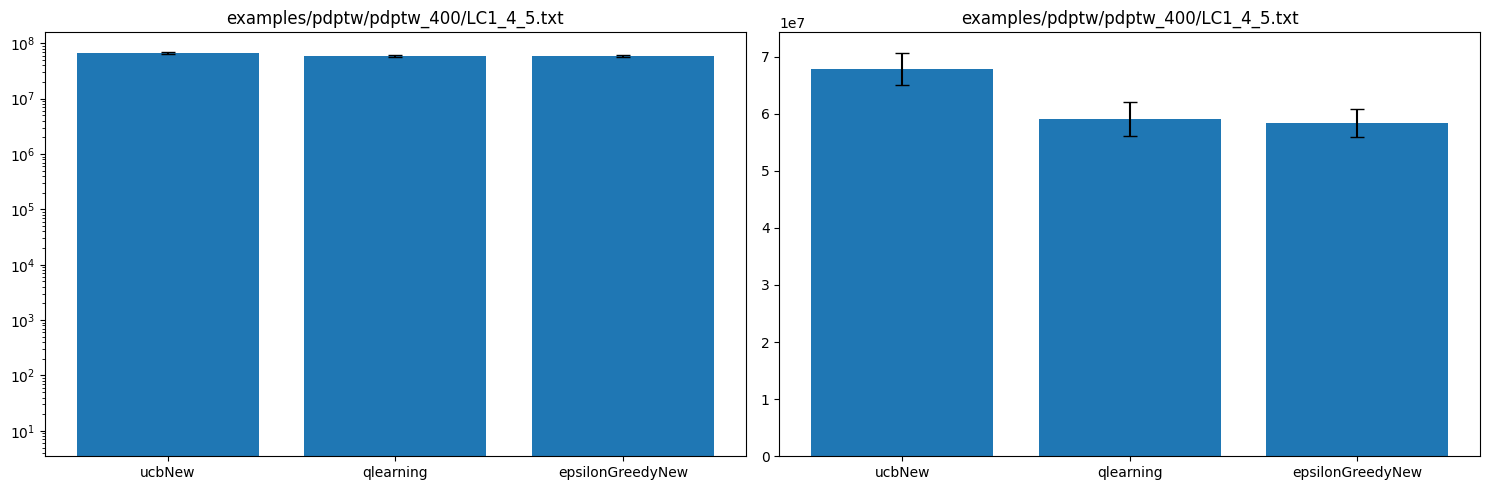

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪════════════╡
│ ucbNew           ┆ 6.7881e7       ┆ 2.8280e6      ┆ 10681.162133 ┆ 310.208403 │
│ qlearning        ┆ 5.9036865e7    ┆ 2.9497e6      ┆ 9370.198333  ┆ 642.494321 │
│ epsilonGreedyNew ┆ 5.8358876e7    ┆ 2.4950e6      ┆ 9501.733143  ┆ 577.508441 │
└──────────────────┴────────────────┴───────────────┴──────────────┴────────────┘


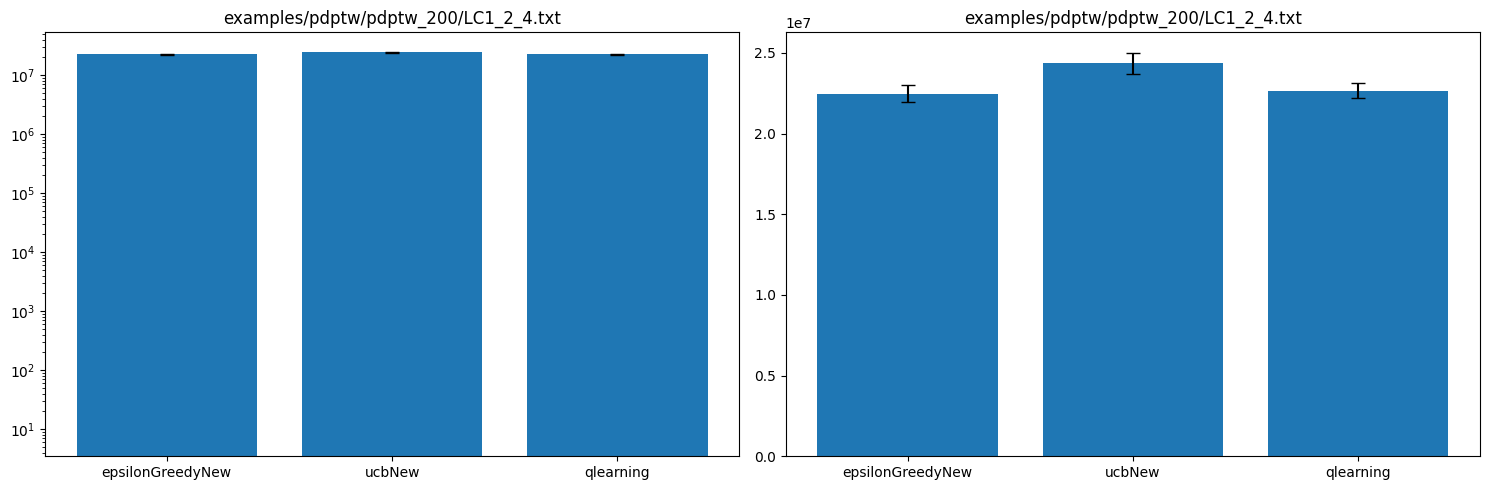

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ epsilonGreedyNew ┆ 2.2471e7       ┆ 543211.458031 ┆ 3185.006786 ┆ 159.496895 │
│ ucbNew           ┆ 2.4358e7       ┆ 659947.574996 ┆ 3491.815933 ┆ 189.383993 │
│ qlearning        ┆ 2.2663e7       ┆ 484926.705872 ┆ 3163.0125   ┆ 116.978246 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


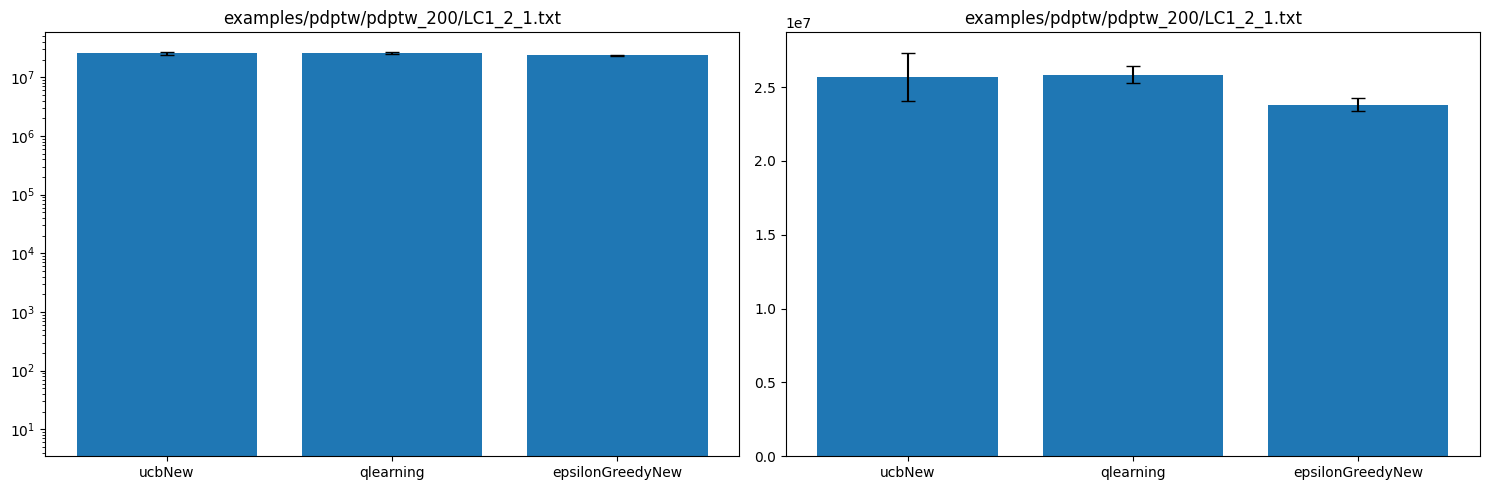

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ ucbNew           ┆ 2.5685e7       ┆ 1.6569e6      ┆ 3085.105933 ┆ 292.258559 │
│ qlearning        ┆ 2.5827492e7    ┆ 569253.590826 ┆ 3077.492    ┆ 118.088882 │
│ epsilonGreedyNew ┆ 2.3811e7       ┆ 435170.540515 ┆ 2810.566357 ┆ 59.176523  │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


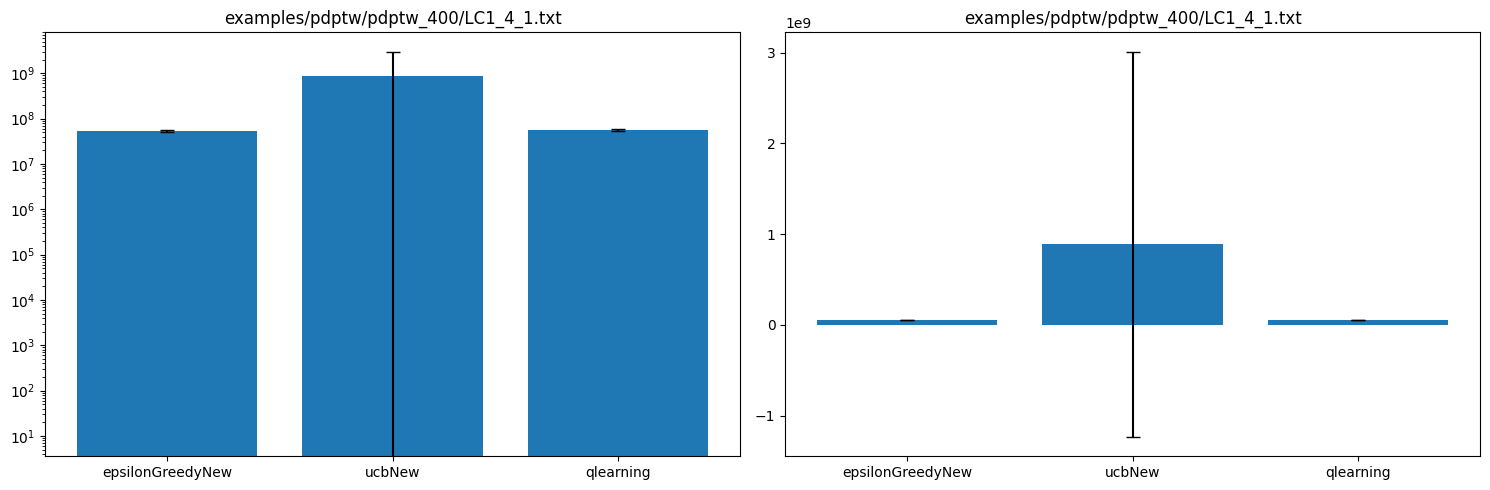

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ epsilonGreedyNew ┆ 5.3462005e7    ┆ 2.0169e6      ┆ 8247.719286  ┆ 432.463666  │
│ ucbNew           ┆ 8.8888e8       ┆ 2.1240e9      ┆ 14677.827067 ┆ 3563.662456 │
│ qlearning        ┆ 5.6899e7       ┆ 2.5522e6      ┆ 8565.275     ┆ 484.420912  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


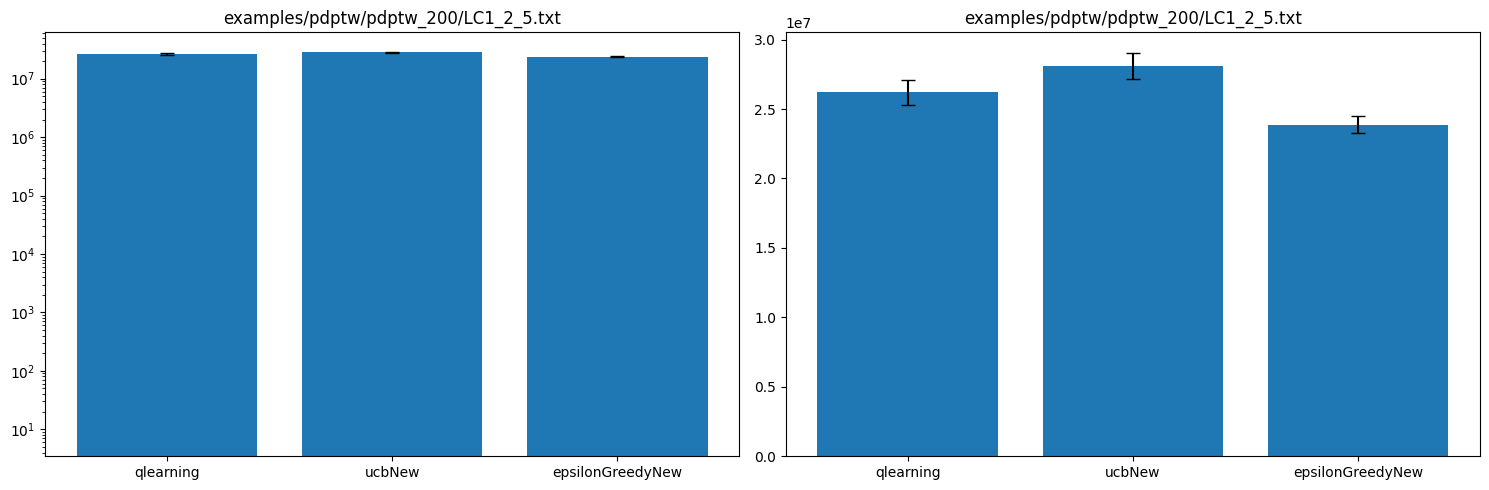

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ qlearning        ┆ 2.6195527e7    ┆ 893711.478136 ┆ 3195.527    ┆ 96.174526  │
│ ucbNew           ┆ 2.8121e7       ┆ 949282.494195 ┆ 3454.4682   ┆ 166.496722 │
│ epsilonGreedyNew ┆ 2.3866e7       ┆ 614846.325097 ┆ 2865.552429 ┆ 70.193165  │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


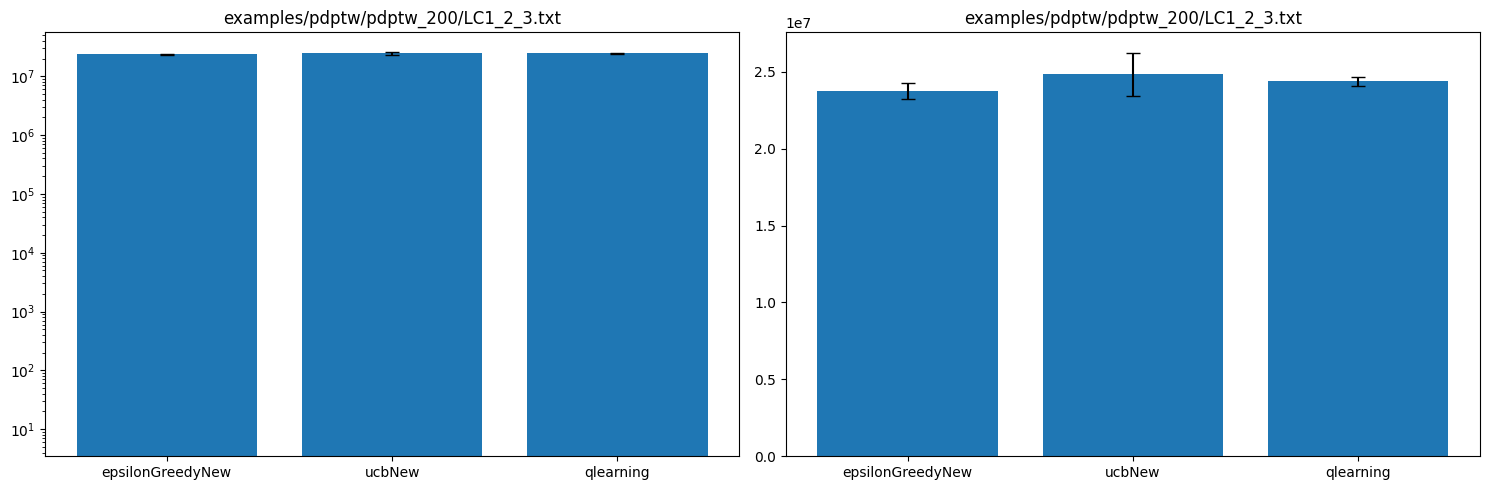

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ epsilonGreedyNew ┆ 2.3759e7       ┆ 516779.052404 ┆ 3330.044643 ┆ 230.661581 │
│ ucbNew           ┆ 2.4835e7       ┆ 1.4144e6      ┆ 3568.472667 ┆ 311.614755 │
│ qlearning        ┆ 2.4371793e7    ┆ 288383.617022 ┆ 3621.793    ┆ 303.489336 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


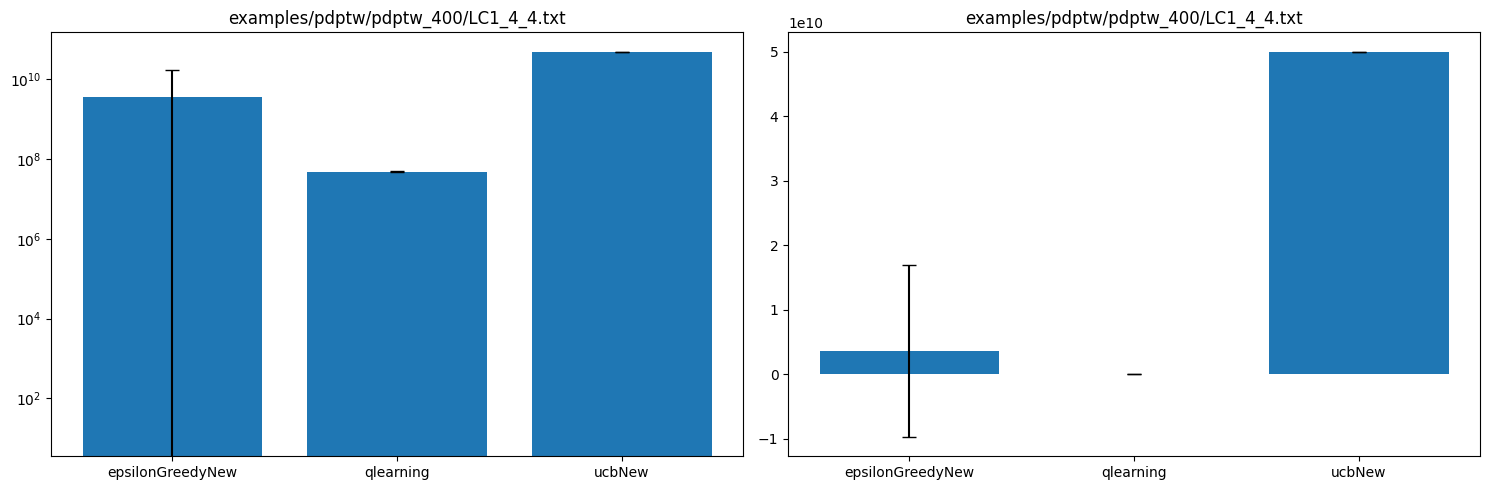

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ epsilonGreedyNew ┆ 3.6201e9       ┆ 1.3362e10     ┆ 9833.603857  ┆ 1345.038853 │
│ qlearning        ┆ 4.8493e7       ┆ 1.3798e6      ┆ 9159.919333  ┆ 463.612003  │
│ ucbNew           ┆ 5.0046e10      ┆ 16061.387812  ┆ 12704.176533 ┆ 16.061388   │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


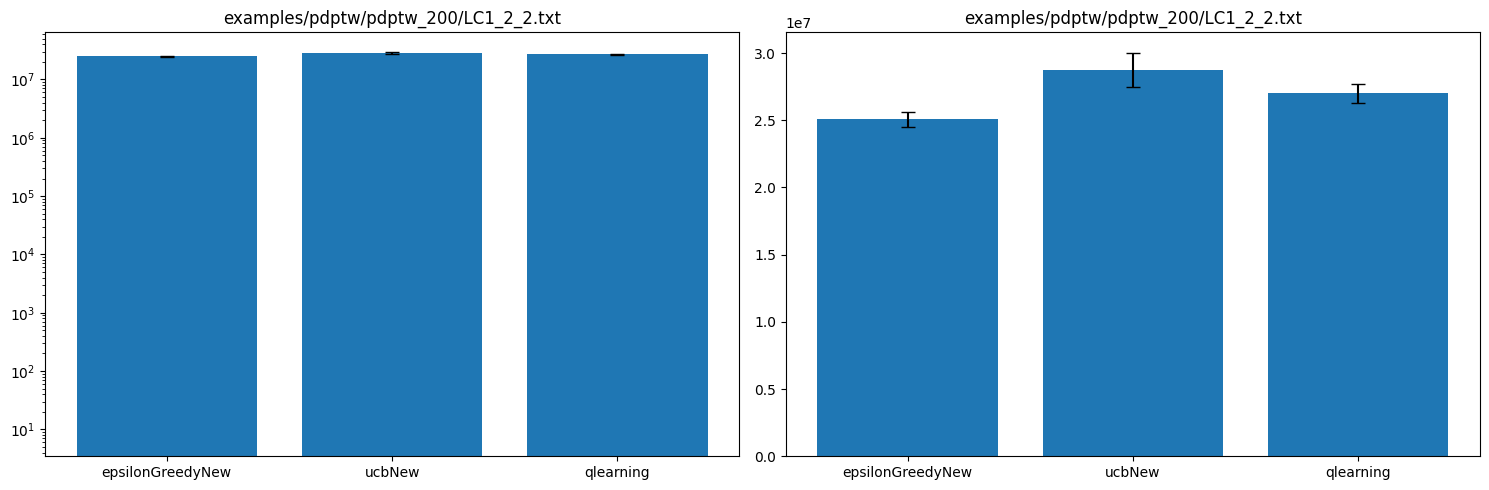

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬─────────────┬────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route  ┆ std-route  │
│ ---              ┆ ---            ┆ ---           ┆ ---         ┆ ---        │
│ str              ┆ f64            ┆ f64           ┆ f64         ┆ f64        │
╞══════════════════╪════════════════╪═══════════════╪═════════════╪════════════╡
│ epsilonGreedyNew ┆ 2.5084e7       ┆ 558306.906705 ┆ 3226.843929 ┆ 102.260752 │
│ ucbNew           ┆ 2.8761e7       ┆ 1.2812e6      ┆ 3694.727067 ┆ 160.738396 │
│ qlearning        ┆ 2.6999e7       ┆ 676771.1743   ┆ 3499.01675  ┆ 108.506017 │
└──────────────────┴────────────────┴───────────────┴─────────────┴────────────┘


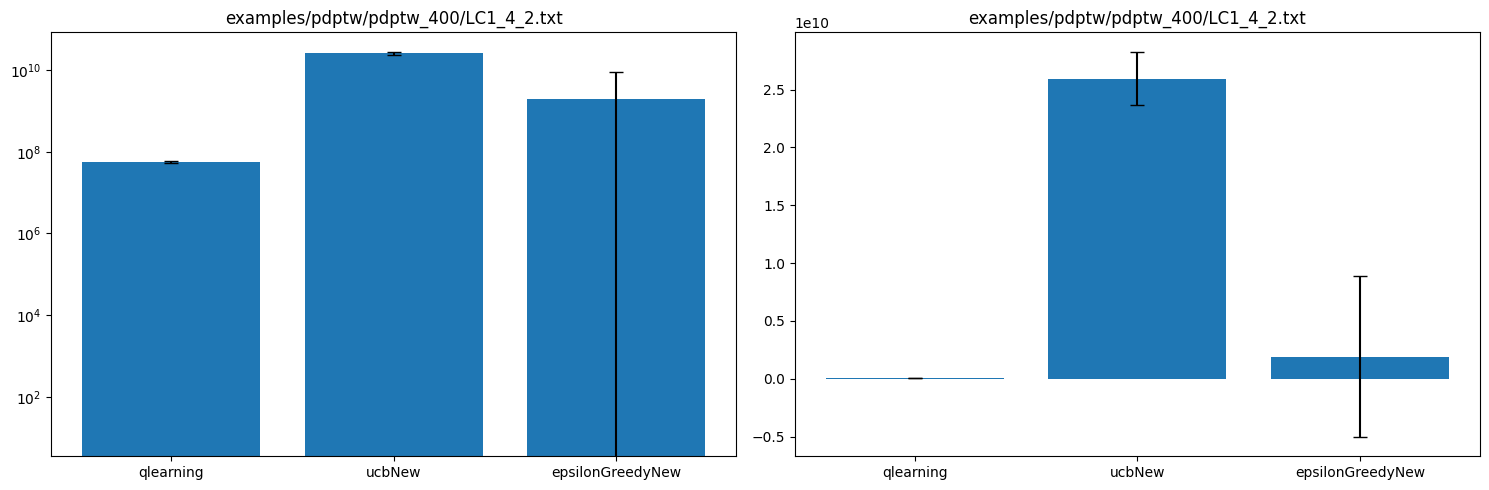

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ qlearning        ┆ 5.686105e7     ┆ 2.3286e6      ┆ 9194.383333  ┆ 804.315571  │
│ ucbNew           ┆ 2.5950e10      ┆ 2.3255e9      ┆ 18490.376133 ┆ 79.968308   │
│ epsilonGreedyNew ┆ 1.9218e9       ┆ 6.9539e9      ┆ 11059.411071 ┆ 2698.895818 │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


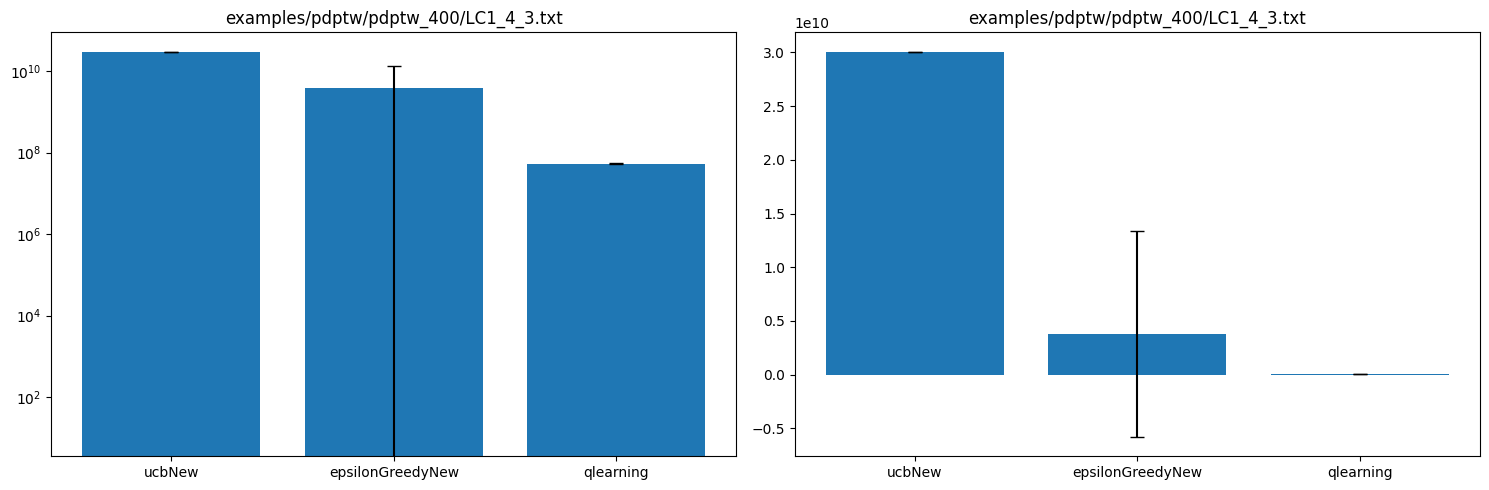

shape: (3, 5)
┌──────────────────┬────────────────┬───────────────┬──────────────┬─────────────┐
│ bandit           ┆ mean-objective ┆ std-objective ┆ mean-route   ┆ std-route   │
│ ---              ┆ ---            ┆ ---           ┆ ---          ┆ ---         │
│ str              ┆ f64            ┆ f64           ┆ f64          ┆ f64         │
╞══════════════════╪════════════════╪═══════════════╪══════════════╪═════════════╡
│ ucbNew           ┆ 3.0072e10      ┆ 58356.042455  ┆ 17372.795267 ┆ 58.356042   │
│ epsilonGreedyNew ┆ 3.7772e9       ┆ 9.5750e9      ┆ 11378.993857 ┆ 2669.440236 │
│ qlearning        ┆ 5.3673e7       ┆ 321149.929108 ┆ 9673.475333  ┆ 321.149929  │
└──────────────────┴────────────────┴───────────────┴──────────────┴─────────────┘


In [16]:
df = pl.read_csv("../../logs/results.csv")
instances = df["instance"].unique()
for instance in instances:
    df_instance = df.filter(df["instance"] == instance)
    # Check if "qlearning" is in the bandit names
    if len(df_instance.filter(pl.col("bandit") == "qlearning")) == 0:
        continue

    stats = df_instance.group_by("bandit").agg(
        pl.mean("objective").alias("mean-objective"),
        pl.std("objective").alias("std-objective"),
        pl.mean("travelLength").alias("mean-route"),
        pl.std("travelLength").alias("std-route"),
    )
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.set_title(instance)
    ax1.set_yscale("log")
    ax1.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)

    ax2.set_title(instance)
    ax2.bar(stats["bandit"], stats["mean-objective"], yerr=stats["std-objective"], capsize=5)
    plt.tight_layout()
    plt.show()
    print(stats)